## Greedy Algorithm
최적의 해에 가까운 값을 구하는데 이용됨 -> 매순간 최적이라고 생각되는 것을 선택 -> 근사치라는 한계
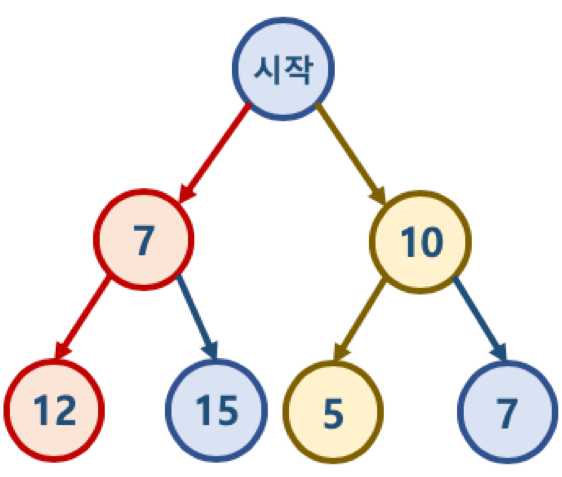
실제 최저 값: 10 -> 5 = 15
but 그리디 알고리즘 적용시 -> 7 -> 12 이므로 19가 됨

####  example1) 
coin problem
* 지불해야 하는 값이 4720원 일 때 1원 50원 100원, 500원 동전으로 동전의 수가 가장 적게 지불하시오.
 * 가장 큰 동전부터 최대한 지불해야 하는 값을 채우는 방식으로 구현 가능
 * 탐욕 알고리즘으로 매순간 최적이라고 생각되는 경우를 선택하면 됨

In [2]:
coin_list = [500, 100, 50, 1]

def min_coin_count(value, coin_list):
    total_coin_count = 0
    details = []
    coin_list.sort(reverse = True)
    for coin in coin_list:
        coin_num = value // coin
        total_coin_count += coin_num
        value -= coin_num * coin
        details.append([coin, coin_num])
    return total_coin_count, details

min_coin_count(4720, coin_list)

(31, [[500, 9], [100, 2], [50, 0], [1, 20]])

#### example2)
fractional knapsack problem(부분 배낭 문제)
* 무게 제한이 k인 배낭에 최대 가치를 가지도록 물건을 넣는 문제
 * 각 물건은 무게(w)와 가치(v)로 표현될 수 있음
 * 물건은 쪼갤 수 있으므로 물건의 일부분이 배낭에 넣어질 수 있음, 그래서 Fractional Knapsack Problem 으로 부름
   * Fractional Knapsack Problem 의 반대로 물건을 쪼개서 넣을 수 없는 배낭 문제도 존재함 (0/1 Knapsack Problem 으로 부름)

In [6]:
data_list = [(10, 10), (15, 12), (20, 10), (25, 8), (30, 5)]

def get_max_values(data_list, capacity):
    data_list = sorted(data_list, key = lambda x: x[1] / x[0], reverse = True)
    total_value = 0
    details = []
    
    for data in data_list:
        if capacity - data[0] >= 0:
            capacity -= data[0]
            total_value += data[1]
            details.append([data[0], data[1], 1])
        else:
            fraction = capacity / data[0]
            total_value += data[1]*fraction
            details.append([data[0], data[1], fraction])
            break
            
    return total_value, details

get_max_values(data_list, 30)

(24.5, [[10, 10, 1], [15, 12, 1], [20, 10, 0.25]])